In [1]:
import pandas as pd
import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [6]:
price_path = './data/data_price/data_price(13ETFs).csv'
# price_path = './result/2022/cashON_signal/result/long_hist/backtest_AML_ETF_2000_202205.csv'
price = pd.read_csv(price_path, index_col=0)
if 'code' in price.columns:
    price = pd.pivot_table(price, values='close', columns='code', index='date')
price.index = pd.to_datetime(price.index).dropna()
price

,DBC,EEM,EWJ,GLD,IYR,LQD,QQQ,SPY,TIP,TLT,VGK,VTI,VYM
1993-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.937500,NaN,NaN,NaN,NaN,NaN
1993-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.250000,NaN,NaN,NaN,NaN,NaN
1993-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.343750,NaN,NaN,NaN,NaN,NaN
1993-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.812500,NaN,NaN,NaN,NaN,NaN
1993-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-30,26.270000,39.290001,53.830002,160.509995,94.639999,110.430000,301.019989,398.209991,114.930000,112.959999,51.770000,200.029999,104.589996
2022-08-31,25.719999,39.430000,53.590000,159.270004,94.260002,109.269997,299.269989,395.179993,113.910004,111.879997,51.320000,198.559998,103.769997
2022-09-01,25.170000,39.119999,52.950001,157.869995,94.430000,108.309998,299.399994,396.420013,111.620003,109.599998,50.500000,198.679993,104.230003
2022-09-02,25.340000,38.759998,52.369999,159.259995,93.209999,108.389999,295.170013,392.239990,112.279999,110.220001,50.160000,196.710007,103.449997


In [7]:
ret_all = price.pct_change().dropna(how='all')
ret_all

,DBC,EEM,EWJ,GLD,IYR,LQD,QQQ,SPY,TIP,TLT,VGK,VTI,VYM
1993-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007112,NaN,NaN,NaN,NaN,NaN
1993-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002119,NaN,NaN,NaN,NaN,NaN
1993-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010571,NaN,NaN,NaN,NaN,NaN
1993-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004184,NaN,NaN,NaN,NaN,NaN
1993-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000694,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-30,-0.027757,-0.011821,-0.001113,-0.008341,-0.014577,0.001269,-0.011136,-0.010978,-0.001737,0.002485,-0.006906,-0.011123,-0.011530
2022-08-31,-0.020936,0.003563,-0.004459,-0.007725,-0.004015,-0.010504,-0.005814,-0.007609,-0.008875,-0.009561,-0.008692,-0.007349,-0.007840
2022-09-01,-0.021384,-0.007862,-0.011943,-0.008790,0.001804,-0.008786,0.000434,0.003138,-0.020104,-0.020379,-0.015978,0.000604,0.004433
2022-09-02,0.006754,-0.009202,-0.010954,0.008805,-0.012920,0.000739,-0.014128,-0.010544,0.005913,0.005657,-0.006733,-0.009915,-0.007484


In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(ret_all.dropna(how='all').dropna(how='all', axis=1).corr())
kmeans.labels_

df = pd.DataFrame(ret_all.columns, index=kmeans.labels_)
df.sort_index()

,0
0,GLD
0,LQD
1,EEM
1,EWJ
1,IYR
1,QQQ
1,SPY
1,VGK
1,VTI
1,VYM


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

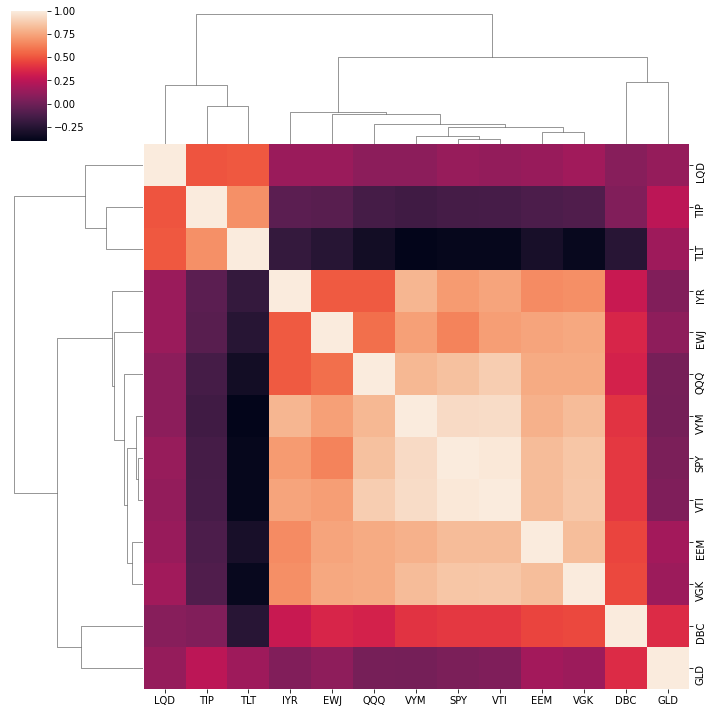

In [13]:
sns.clustermap(ret_all.dropna(how='all').dropna(how='all', axis=1).corr())

In [24]:
reordered_ind = clustermap.dendrogram_row.reordered_ind
reordered_ind

[5, 8, 9, 4, 2, 6, 12, 7, 11, 1, 10, 0, 3]

In [30]:
labels_list

['LQD',
 'TIP',
 'TLT',
 'IYR',
 'EWJ',
 'QQQ',
 'VYM',
 'SPY',
 'VTI',
 'EEM',
 'VGK',
 'DBC',
 'GLD']

In [14]:
labels

[Text(1, 0.5, 'LQD'),
 Text(1, 1.5, 'TIP'),
 Text(1, 2.5, 'TLT'),
 Text(1, 3.5, 'IYR'),
 Text(1, 4.5, 'EWJ'),
 Text(1, 5.5, 'QQQ'),
 Text(1, 6.5, 'VYM'),
 Text(1, 7.5, 'SPY'),
 Text(1, 8.5, 'VTI'),
 Text(1, 9.5, 'EEM'),
 Text(1, 10.5, 'VGK'),
 Text(1, 11.5, 'DBC'),
 Text(1, 12.5, 'GLD')]

In [29]:
labels_list = []
number_list = []
for i in labels:
    i = str(i)
    # print(i)
    name_start = i.find('\'')+1
    # print(name_start)
    name_end = i.rfind('\'')
    # print(name_end)
    name = i[name_start:name_end]
    # print(name)
    labels_list.append(name)

df = pd.DataFrame(reordered_ind, index=labels_list)
df

,0
LQD,5
TIP,8
TLT,9
IYR,4
EWJ,2
QQQ,6
VYM,12
SPY,7
VTI,11
EEM,1


In [ ]:
labels_list

In [1]:
asset_class = {
    'Equities': ['VTI', 'EEM', 'SPY', 'QQQ', 'VGK', 'EWJ'],
    'Commodities': ['DBC', 'GLD'],
    'Corp_Credit': ['LQD', 'VYM', 'IYR'],
    'Nominal_Bonds': ['TLT'],
    'IL_Bonds': ['TIP']
}

df = pd.DataFrame(asset_class.values(), index=asset_class.keys())
df


NameError: name 'pd' is not defined

In [51]:
df = df.stack()
df.index = df.index.droplevel(level=1)
df = df.to_frame().reset_index(drop=False)
df.columns = ['cluster', 'asset']
df = df.set_index('asset')
df

,cluster
asset,
VTI,Equities
EEM,Equities
SPY,Equities
QQQ,Equities
VGK,Equities
EWJ,Equities
DBC,Commodities
GLD,Commodities
LQD,Corp_Credit


In [52]:
corr_assets = ['VTI', 'DBC', 'LQD', 'TLT']
# df['chosen'] = 0
df.loc[corr_assets, 'chosen'] = 1
df

,cluster,chosen
asset,,
VTI,Equities,1.0
EEM,Equities,NaN
SPY,Equities,NaN
QQQ,Equities,NaN
VGK,Equities,NaN
EWJ,Equities,NaN
DBC,Commodities,1.0
GLD,Commodities,NaN
LQD,Corp_Credit,1.0


In [15]:
asset_class = {
    'Equities': ['VTI', 'EEM', 'SPY', 'QQQ', 'VGK', 'EWJ'],
    'Commodities': ['DBC', 'GLD'],
    'Corp_Credit': ['LQD', 'VYM', 'IYR'],
    'Nominal_Bonds': ['TLT'],
    'IL_Bonds': ['TIP']
}

In [7]:
asset_class = {
    'Equities': ['AML_EWU', 'AML_EWC', 'AML_EWG', 'AML_EWH', 'AML_EWJ', 'AML_SPY'],
    'Commodities': ['AML_CORN', 'AML_GLD', 'AML_WEAT', 'AML_LC1_COMDTY', 'AML_SOYB', 'AML_SB1_COMDTY'],
    'Corp_Credit': ['AML_LQD',],
    'Nominal_Bonds': ['AML_TLT', 'AML_IEF'],
    'IL_Bonds': ['AML_TIP']
}

In [8]:
ll = []
for key in asset_class.keys():
    ll += asset_class[key]
ll

['AML_EWU',
 'AML_EWC',
 'AML_EWG',
 'AML_EWH',
 'AML_EWJ',
 'AML_SPY',
 'AML_CORN',
 'AML_GLD',
 'AML_WEAT',
 'AML_LC1_COMDTY',
 'AML_SOYB',
 'AML_SB1_COMDTY',
 'AML_LQD',
 'AML_TLT',
 'AML_IEF',
 'AML_TIP']

In [8]:
# PCA choose high

class ScaleMinMax():
    def __init__(self, feature_range=(0, 1)):
        self.feature_range = feature_range
    
    def fit(self, X):
        self.scaler = MinMaxScaler(feature_range=self.feature_range)
        self.scaler.fit(X)
        return self
    
    def transform(self, X):
        X_cols = X.columns
        X_idx = X.index
        new_X = self.scaler.transform(X)
        new_X = pd.DataFrame(
            new_X, columns=X_cols, index=X_idx)
        return new_X


class GenPCA_featureImportance():
    def fit(self, X, keep):
        max_components = min(50, X.shape[1])#, keep
        self.pca = PCA(n_components=max_components)
        self.pca.fit(X)
        total_explained_variance_ratio_ = 0
        for i, r in enumerate(self.pca.explained_variance_ratio_):
            total_explained_variance_ratio_ += r
            if total_explained_variance_ratio_ >= 0.9:
                break
        self.firstNcomponent = i + 1
        print("TOP {} component explained_variance_ratio: {}".format(
            self.firstNcomponent, total_explained_variance_ratio_))
        component_weight = pd.DataFrame(
            abs(self.pca.components_), columns=X.columns,
            index=list(range(max_components)))
        topN_feature_df = component_weight.iloc[:self.firstNcomponent, :].sum().sort_values(ascending=False)
        self.topN_feature = list(topN_feature_df.index)[:keep]
        return self

    def transform(self, X):
        new_X = X[self.topN_feature]
        new_X = new_X.values
        return new_X

TOP 1 component explained_variance_ratio: 0.5314157485244282
return: Equities ['AML_EWH']
TOP 1 component explained_variance_ratio: 0.42021433138479214
return: Commodities ['AML_SB1_COMDTY']
TOP 1 component explained_variance_ratio: 1.0
return: Corp_Credit ['AML_LQD']
TOP 1 component explained_variance_ratio: 0.8615381511704738
return: Nominal_Bonds ['AML_TLT']
TOP 1 component explained_variance_ratio: 1.0
return: IL_Bonds ['AML_TIP']


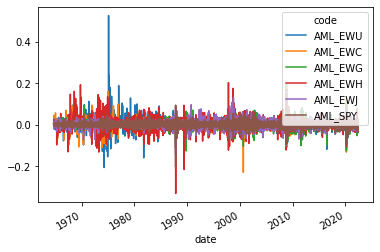

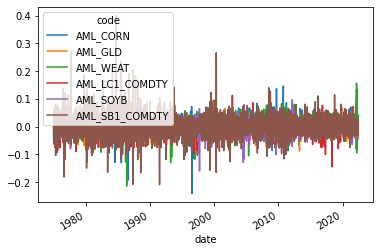

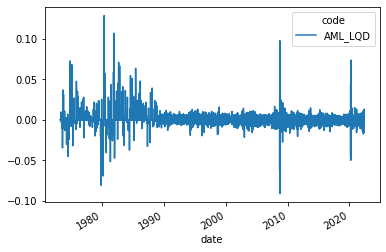

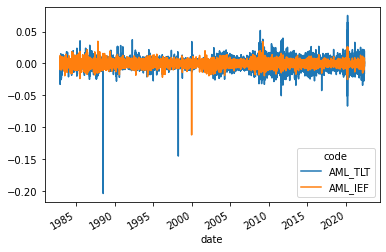

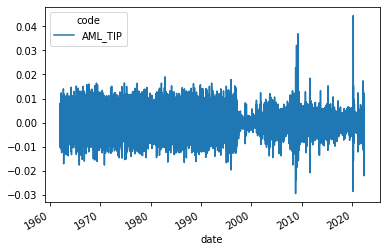

In [10]:
keep = 1
for key, assets in asset_class.items():
    print("=========================================")
    
    # pca = GenPCA_featureImportance()
    # pca.fit(price[assets].dropna(), keep)
    # price[assets].dropna().plot()
    # print("price:", key, pca.topN_feature)

    pca = GenPCA_featureImportance()
    pca.fit(ret_all[assets].dropna(), keep)
    ret_all[assets].dropna().plot()
    print("return:", key, pca.topN_feature)

In [ ]:
keep = 1
for key, assets in asset_class.items():
    print("=========================================")
    sub_price = price[assets].dropna()
    scaler = ScaleMinMax(feature_range=(0, 100))
    scaler.fit(sub_price)
    sub_price = scaler.transform(sub_price)

    sub_price.plot()
    pca = GenPCA_featureImportance()
    pca.fit(sub_price, keep)
    print("price:", key, pca.topN_feature)

    sub_price = ret_all[assets].dropna()
    scaler = ScaleMinMax(feature_range=(0, 100))
    scaler.fit(sub_price)
    sub_price = scaler.transform(sub_price)

    pca = GenPCA_featureImportance()
    pca.fit(sub_price, keep)
    sub_price.plot()
    print("return:", key, pca.topN_feature)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

In [5]:
sns.clustermap(ret_all[ll][:'1987'].dropna(how='all').dropna(how='all', axis=1).corr())

NameError: name 'ret_all' is not defined

TOP 1 component explained_variance_ratio: 1.0
return: 0 ['AML_TIP']
TOP 4 component explained_variance_ratio: 0.9090221160671318
return: 1 ['AML_GLD']
TOP 2 component explained_variance_ratio: 0.9999999999999999
return: 2 ['AML_EWU']
TOP 5 component explained_variance_ratio: 0.9468421397065947
return: 3 ['AML_EWG']


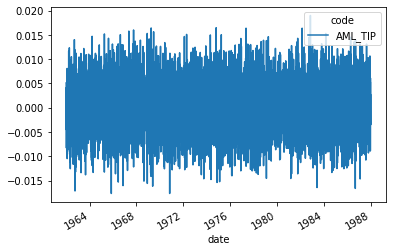

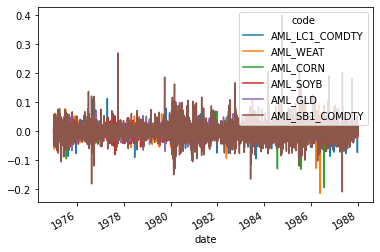

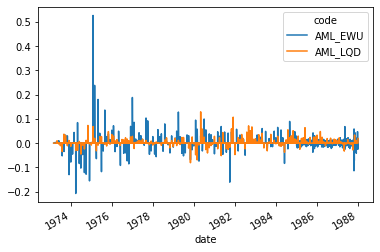

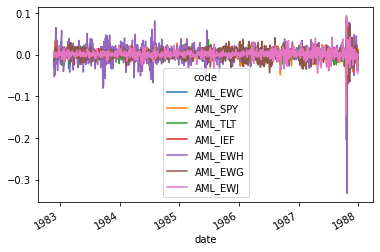

In [19]:
asset_class = {
    '0': ['AML_TIP'],
    '1': ['AML_LC1_COMDTY', 'AML_WEAT', 'AML_CORN', 'AML_SOYB', 'AML_GLD', 'AML_SB1_COMDTY'],
    '2': ['AML_EWU', 'AML_LQD'],
    '3': ['AML_EWC', 'AML_SPY', 'AML_TLT', 'AML_IEF', 'AML_EWH', 'AML_EWG', 'AML_EWJ'],
}


keep = 1
for key, assets in asset_class.items():
    print("=========================================")
    
    # pca = GenPCA_featureImportance()
    # pca.fit(price[assets].dropna(), keep)
    # price[assets].dropna().plot()
    # print("price:", key, pca.topN_feature)

    pca = GenPCA_featureImportance()
    pca.fit(ret_all[assets][:'1987'].dropna(how='all', axis=1).dropna(), keep)
    ret_all[assets][:'1987'].dropna().plot()
    print("return:", key, pca.topN_feature)

In [15]:
ll

['AML_EWU',
 'AML_EWC',
 'AML_EWG',
 'AML_EWH',
 'AML_EWJ',
 'AML_SPY',
 'AML_CORN',
 'AML_GLD',
 'AML_WEAT',
 'AML_LC1_COMDTY',
 'AML_SOYB',
 'AML_SB1_COMDTY',
 'AML_LQD',
 'AML_TLT',
 'AML_IEF',
 'AML_TIP']

In [ ]:
asset_class = {
    '0': ['AML_TIP'],
    '1': ['AML_LC1_COMDTY', 'AML_WEAT', 'AML_CORN', 'AML_SOYB', 'AML_GLD', 'AML_SB1_COMDTY'],
    '2': ['AML_EWU', 'AML_LQD'],
    '3': ['AML_EWC', 'AML_SPY', 'AML_TLT', 'AML_IEF', 'AML_EWH', 'AML_EWG', 'AML_EWJ'],
}

TOP 5 component explained_variance_ratio: 0.9422157639073476
return: Equities ['AML_EWG']
TOP 4 component explained_variance_ratio: 0.9090221160671317
return: Commodities ['AML_GLD']
TOP 1 component explained_variance_ratio: 1.0
return: Corp_Credit ['AML_LQD']
TOP 3 component explained_variance_ratio: 1.0
return: Nominal_Bonds ['AML_IEF']


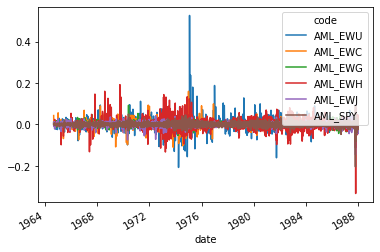

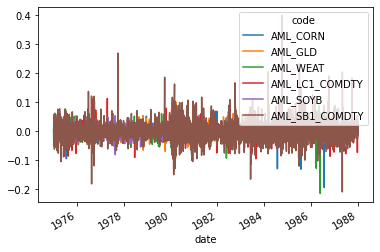

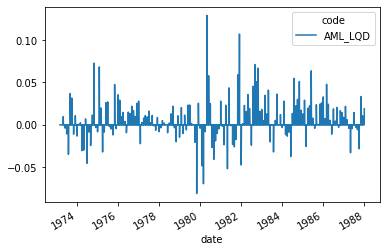

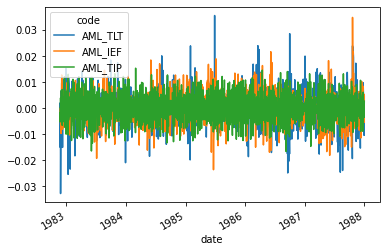

In [18]:
asset_class = {
    'Equities': ['AML_EWU', 'AML_EWC', 'AML_EWG', 'AML_EWH', 'AML_EWJ', 'AML_SPY'],
    'Commodities': ['AML_CORN', 'AML_GLD', 'AML_WEAT', 'AML_LC1_COMDTY', 'AML_SOYB', 'AML_SB1_COMDTY'],
    'Corp_Credit': ['AML_LQD',],
    'Nominal_Bonds': ['AML_TLT', 'AML_IEF', 'AML_TIP'],
    # 'IL_Bonds': ['AML_TIP']
}


keep = 1
for key, assets in asset_class.items():
    print("=========================================")
    
    # pca = GenPCA_featureImportance()
    # pca.fit(price[assets].dropna(), keep)
    # price[assets].dropna().plot()
    # print("price:", key, pca.topN_feature)

    pca = GenPCA_featureImportance()
    pca.fit(ret_all[assets][:'1987'].dropna(how='all', axis=1).dropna(), keep)
    ret_all[assets][:'1987'].dropna().plot()
    print("return:", key, pca.topN_feature)

TOP 1 component explained_variance_ratio: 0.6732740217527268
return: 0 ['AML_EWG']
TOP 1 component explained_variance_ratio: 0.5351286857684368
return: 1 ['AML_GLD']
TOP 1 component explained_variance_ratio: 0.4912685865882315
return: 2 ['AML_WEAT']
TOP 1 component explained_variance_ratio: 0.7094117734790969
return: 3 ['AML_TLT']


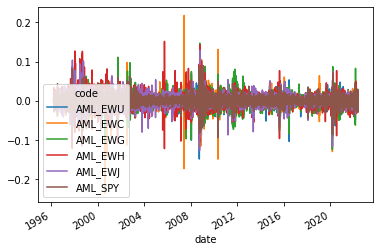

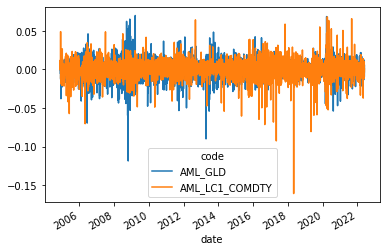

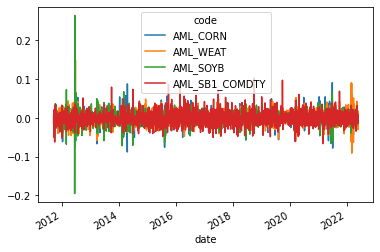

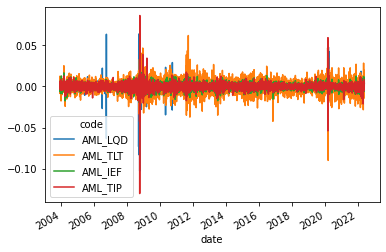

In [30]:
# asset_class = {
#     0: ['EEM', 'EWJ', 'IYR', 'QQQ', 'SPY', 'VGK', 'VTI', 'VYM', 'DBC'],
#     1: ['TIP', 'TLT'],
#     2: ['GLD', 'LQD']
# }

asset_class = {
    0: ['AML_EWU', 'AML_EWC', 'AML_EWG', 'AML_EWH', 'AML_EWJ', 'AML_SPY'],
    1: ['AML_GLD', 'AML_LC1_COMDTY', ],
    2: ['AML_CORN', 'AML_WEAT', 'AML_SOYB', 'AML_SB1_COMDTY'],
    3: ['AML_LQD','AML_TLT', 'AML_IEF', 'AML_TIP'],
}


keep = 1
for key, assets in asset_class.items():
    print("=========================================")
    
    # pca = GenPCA_featureImportance()
    # pca.fit(price[assets].dropna(), keep)
    # price[assets].dropna().plot()
    # print("price:", key, pca.topN_feature)

    pca = GenPCA_featureImportance()
    pca.fit(ret_all[assets].dropna(), keep)
    ret_all[assets].dropna().plot()
    print("return:", key, pca.topN_feature)

TOP 1 component explained_variance_ratio: 0.6732740217527268
return: Equities ['AML_EWG']
TOP 1 component explained_variance_ratio: 0.3852018916394447
return: Commodities ['AML_WEAT']
TOP 1 component explained_variance_ratio: 1.0
return: Corp_Credit ['AML_LQD']
TOP 1 component explained_variance_ratio: 0.8372734828880948
return: Nominal_Bonds ['AML_TLT']


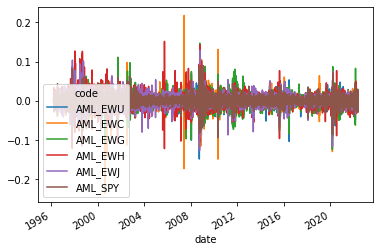

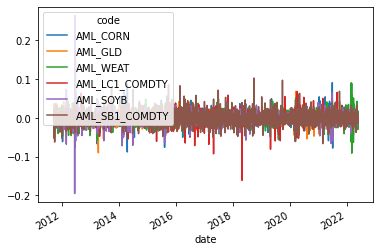

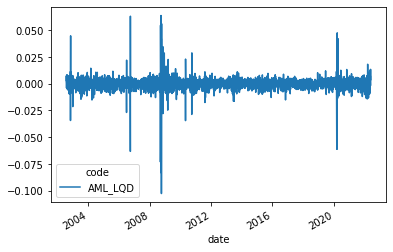

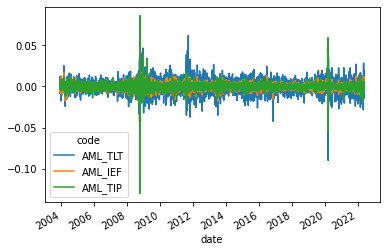

In [32]:
# asset_class = {
#     0: ['EEM', 'EWJ', 'IYR', 'QQQ', 'SPY', 'VGK', 'VTI', 'VYM', 'DBC'],
#     1: ['TIP', 'TLT'],
#     2: ['GLD', 'LQD']
# }

asset_class = {
    'Equities': ['AML_EWU', 'AML_EWC', 'AML_EWG', 'AML_EWH', 'AML_EWJ', 'AML_SPY'],
    'Commodities': ['AML_CORN', 'AML_GLD', 'AML_WEAT', 'AML_LC1_COMDTY', 'AML_SOYB', 'AML_SB1_COMDTY'],
    'Corp_Credit': ['AML_LQD',],
    'Nominal_Bonds': ['AML_TLT', 'AML_IEF', 'AML_TIP'],
    # 'IL_Bonds': ['AML_TIP']
}

keep = 1
for key, assets in asset_class.items():
    print("=========================================")
    
    # pca = GenPCA_featureImportance()
    # pca.fit(price[assets].dropna(), keep)
    # price[assets].dropna().plot()
    # print("price:", key, pca.topN_feature)

    pca = GenPCA_featureImportance()
    pca.fit(ret_all[assets].dropna(), keep)
    ret_all[assets].dropna().plot()
    print("return:", key, pca.topN_feature)